1. **Import Necessary Libraries**

- First, set up your libraries. If you’re using TensorFlow or another deep learning library for LSTM, ensure they’re installed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

2. **Load and Preprocess Data**

- Load your Tesla stock data (historical prices) and select the necessary columns.

In [114]:
# Load historical data
data = pd.read_csv('../data/TSLA.csv', parse_dates=['Date'], index_col='Date')
data = data[['Close']]

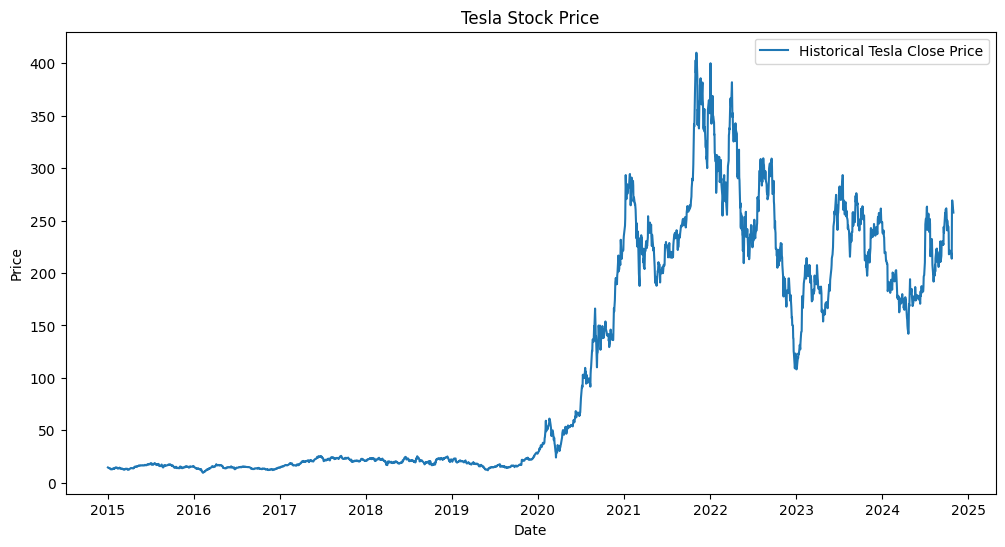

In [115]:
# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(data, label="Historical Tesla Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tesla Stock Price")
plt.legend()
plt.show()

3. **Forecast Using the Chosen Model**

**(A) ARIMA Forecast**

- If you developed an ARIMA model in Task 2, use it for forecasting future prices.

**Define and fit ARIMA model (adjust p, d, q based on Task 2)**

In [116]:
data = data.asfreq('D')  # 'D' for daily frequency, adjust if using a different frequency

### Using the best model ARIMA for TSLA is : Best model:  ARIMA(0,1,0)(0,0,0)[0] 

Use the Trained Model for Forecasting

In [25]:
arima_model = ARIMA(data, order=(0,1,0)) 
arima_result = arima_model.fit()

**Forecast for the next 6-12 months (let us take 200 days)**

In [26]:
forecast_arima = arima_result.get_forecast(steps=200)
forecast_df = forecast_arima.conf_int()
forecast_df["Forecast"] = arima_result.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

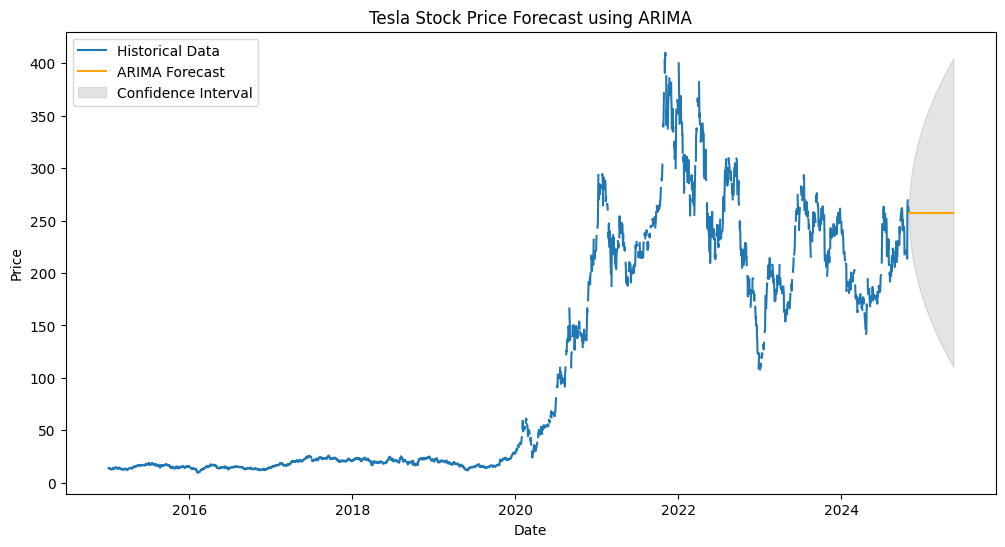

In [27]:
# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label="Historical Data")
plt.plot(forecast_df["Forecast"], color="orange", label="ARIMA Forecast")
plt.fill_between(forecast_df.index, 
                 forecast_df["lower Close"], 
                 forecast_df["upper Close"], color='k', alpha=0.1, label="Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tesla Stock Price Forecast using ARIMA")
plt.legend()
plt.show()

### Interpretation

#### 1. Trend Analysis

- **Long-term Trend:** The historical data suggests that Tesla's stock price has shown significant growth over time, especially with peaks around 2021 and continued fluctuations through 2023. However, the recent trend appears to be more stable or slightly downward, indicating a potential slowing in growth.

- **Forecast Trend:** The forecast line is mostly stable, suggesting that, based on the ARIMA model, Tesla’s stock price is expected to hold steady in the short term rather than experiencing significant growth or decline.

#### 2. Volatility and Risk

- **Confidence Intervals:** The shaded region around the forecast (confidence interval) shows the range within which the model expects Tesla’s stock price to fluctuate. The width of this interval reflects the model's uncertainty. In this case, the confidence interval is relatively wide, indicating a high level of uncertainty in the predictions.

- **Volatility Periods:** The widening confidence interval towards the end of the forecast period suggests increased volatility over time. This could mean that while the model expects a general stable price trend, it also anticipates potential price swings as time progresses.

#### 3. Market Opportunities and Risks

- **Market Opportunities:** If Tesla's price stabilizes as projected, this could represent an opportunity for conservative investors who prefer lower-risk investments in a steady market. Additionally, if any upward trend develops within the forecast interval, investors could capitalize on price increases.

- **Market Risks:** The forecast implies that there could be a period of high uncertainty, as evidenced by the confidence interval width. This could pose a risk for investors, as larger price fluctuations are possible. High volatility may deter risk-averse investors, especially if external market factors exacerbate the fluctuations.

**In summary, the ARIMA forecast suggests a stable trend with potential for increased volatility, indicating moderate risks and possible opportunities if stability is maintained.**

**(B) SARIMA Forecast**

- If you detected seasonality and used SARIMA in Task 2, apply it for forecasting.

### Using the best model SARIMA for TSLA is : Best model:  ARIMA(1,1,0)(2,0,0)[12] 

Use the Trained Model for Forecasting

In [22]:
# Define and fit SARIMA model (adjust p, d, q, seasonal terms based on Task 2)
sarima_model = SARIMAX(data, order=(1, 1, 0), seasonal_order=(2, 0, 0, 12))
sarima_result = sarima_model.fit()

**Forecast for 6-12 months (let us take 200 days)**

In [23]:
# Forecast for 6-12 months
forecast_sarima = sarima_result.get_forecast(steps=200)
forecast_df_sarima = forecast_sarima.conf_int()
forecast_df_sarima["Forecast"] = sarima_result.predict(start=forecast_df_sarima.index[0], end=forecast_df_sarima.index[-1])

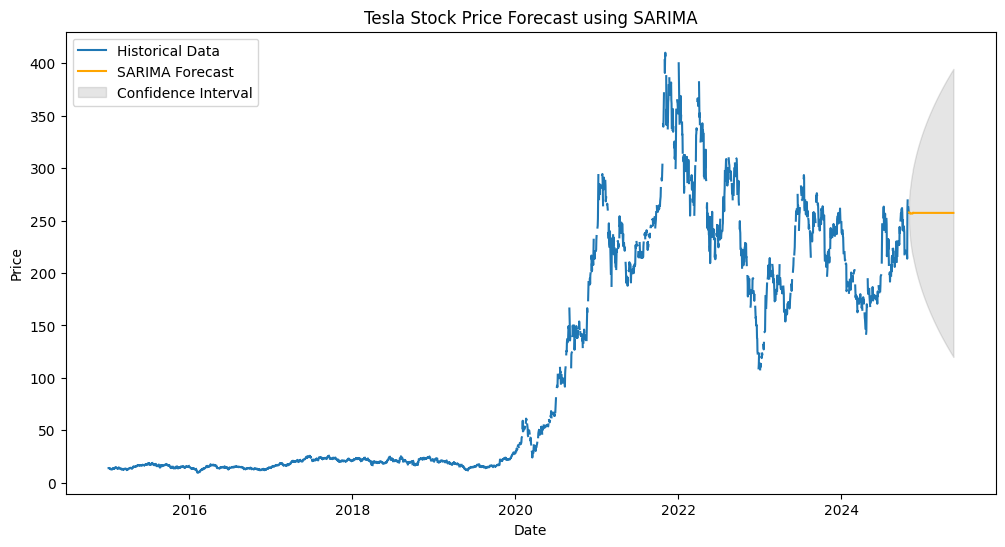

In [24]:
# Plot SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label="Historical Data")
plt.plot(forecast_df_sarima["Forecast"], color="orange", label="SARIMA Forecast")
plt.fill_between(forecast_df_sarima.index, 
                 forecast_df_sarima["lower Close"], 
                 forecast_df_sarima["upper Close"], color='k', alpha=0.1, label="Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tesla Stock Price Forecast using SARIMA")
plt.legend()
plt.show()

## Interpretation

### 1. Trend Analysis

- **Long-term Trends:** The historical data shows a significant upward trend in Tesla’s stock price until late 2021, followed by volatility. The SARIMA forecast suggests a stable price level in the near term, indicating a neutral or slightly upward expectation.

- **Patterns or Anomalies:** No major new trends or shifts are evident in the forecast period. This stability may imply that the SARIMA model did not detect seasonal variations significant enough to suggest new directional trends.

### 2. Volatility and Risk

- **Uncertainty Levels:** The gray-shaded confidence interval indicates the model's uncertainty. It expands slightly as time progresses, capturing potential volatility. The intervals are relatively narrow, suggesting moderate volatility but not extreme unpredictability in the stock's future price within the forecasted range.

- **Periods of Increased Volatility:** The expanding confidence intervals toward the end of the forecast period suggest a gradual increase in uncertainty, which could imply the potential for moderate price fluctuations.

### 3. Market Opportunities and Risks

- **Opportunities:** With a relatively stable forecast, investors may interpret this as a period of reduced risk for holding Tesla stock, assuming no unexpected market shifts.

- **Risks:** The slight expansion in the confidence interval suggests a modest risk of increased volatility. If Tesla’s price deviates significantly from this forecast, it could indicate that unforeseen market or sector-specific factors are at play, introducing higher risk.

**This SARIMA model seems to capture short-term stability but may be limited in forecasting significant directional changes, possibly due to Tesla's complex market dynamics and unpredictable external factors. It might be useful to compare this with additional models or incorporate more recent trends for a comprehensive risk assessment.**

**(C) LSTM Forecast**

- For LSTM, normalize data and prepare it in the required format, then use the trained model to forecast.

In [107]:
# Step 2: Preprocessing - Scaling the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define a function to create sequences of data for training
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Sequence length (number of previous days to consider for prediction)
seq_length = 60  # e.g., past 60 days

In [108]:
# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

In [109]:
from tensorflow.keras.callbacks import EarlyStopping

In [110]:
# Step 3: Build the LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, callbacks=[early_stop])

Epoch 1/20


c:\Users\Hello\Desktop\Html-Tutorial\Document\KAIM-Courses\Week-11_GMF_investment_strategies\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0273 - val_loss: 0.0028
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 9.0785e-04 - val_loss: 0.0018
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 9.9548e-04 - val_loss: 0.0018
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7.6713e-04 - val_loss: 0.0015
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 7.2645e-04 - val_loss: 0.0017
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 6.8228e-04 - val_loss: 0.0013
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 6.5135e-04 - val_loss: 0.0013
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 6.5046e-04 - val_loss: 0.0019
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 6.7221e-04 - val_loss: 0.0023
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 6.4263e-04 - val_loss: 0.0018
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━

In [111]:
# Step 4: Forecast Future Prices
# Use the last sequence of data to make future predictions
forecast_horizon = 200  # Forecast for 180 days (6 months)
forecast = []
input_sequence = x_test[-1]  # Start with the last sequence in the test set

for _ in range(forecast_horizon):
    predicted_price = model.predict(input_sequence.reshape(1, seq_length, 1))
    forecast.append(predicted_price[0][0])
    input_sequence = np.append(input_sequence[1:], predicted_price, axis=0)

# Inverse transform to get the actual prices
forecast_prices = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

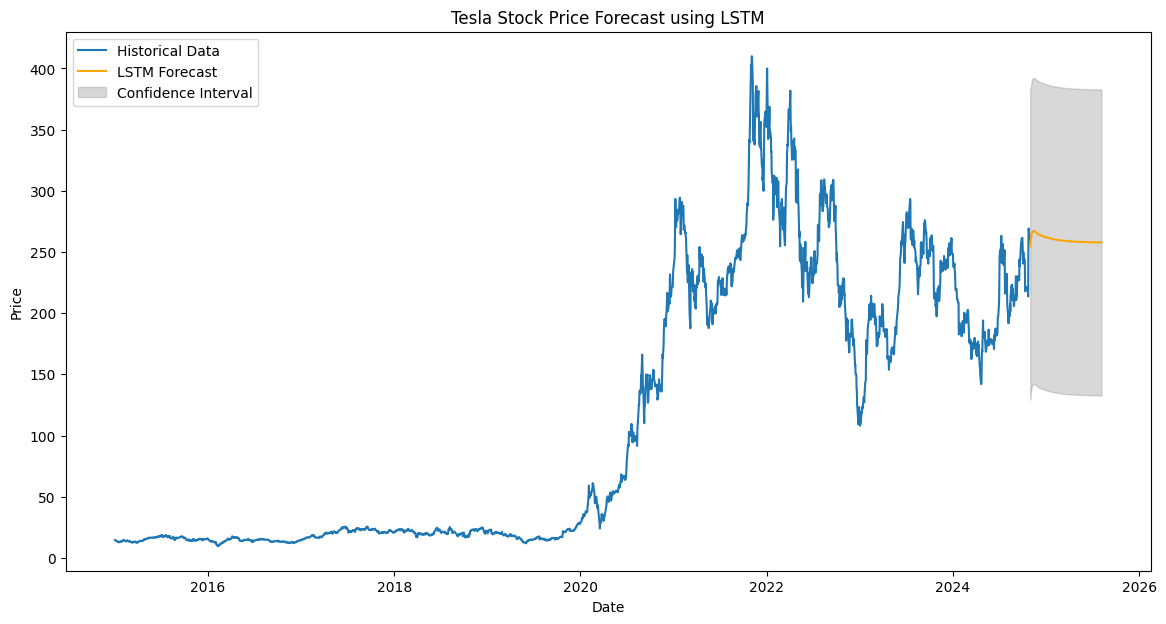

In [112]:
# Step 5: Visualize the Results
# Combine historical data and forecasted data
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_horizon + 1, freq='B')[1:]
forecast_df = pd.DataFrame(data=forecast_prices, index=forecast_dates, columns=['Forecast'])

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Data')
plt.plot(forecast_df, color='orange', label='LSTM Forecast')
plt.fill_between(forecast_df.index, 
                 forecast_df['Forecast'] - 125,  # Adjust margin for confidence interval
                 forecast_df['Forecast'] + 125, 
                 color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Price Forecast using LSTM')
plt.legend()
plt.show()

In [113]:
# Step 6: Interpretation of Results
# Calculate expected return and risk metrics
expected_return = (forecast_df['Forecast'].iloc[-1] / forecast_df['Forecast'].iloc[0]) - 1
forecast_volatility = np.std(forecast_prices)

print("Expected Return over Forecast Period:", expected_return)
print("Forecast Volatility (Std Dev):", forecast_volatility)

Expected Return over Forecast Period: 0.013478637
Forecast Volatility (Std Dev): 2.6214237


## Interpretation

### 1. Trend Analysis

- The forecasted trend for Tesla’s stock appears relatively stable, suggesting a continuation of the recent price levels rather than a significant increase or decline. This may imply that, according to the LSTM model, Tesla's stock could experience minimal growth or change over the forecasted period. However, it is also notable that Tesla's historical data shows significant upward and downward trends, which may indicate inherent volatility.

### 2. Volatility and Risk
- The gray confidence interval region around the forecast line captures the uncertainty in the predictions. This region is moderately wide, reflecting a degree of uncertainty in the model's predictions. Such confidence intervals indicate that the actual prices could deviate significantly from the forecasted line, highlighting the potential for both positive and negative fluctuations. If the intervals widen further over time, it would signal increasing uncertainty, potentially linked to market or economic events affecting Tesla's stock performance.

### 3. Market Opportunities and Risks

- **Opportunities:** If the forecast remains stable with limited downside volatility, this could be an opportunity for long-term investors seeking steady returns without major expected price drops.

- **Risks:** The uncertainty highlighted by the confidence intervals poses risks, especially for short-term investors. The potential for prices to fall within this range could expose investors to possible losses. Given Tesla’s historical volatility, there could also be unexpected spikes or dips outside the confidence intervals.

**In summary, while the LSTM forecast suggests a stable trend, the broad confidence interval warns of moderate uncertainty. Investors may want to consider balancing their portfolios with more stable assets if they are concerned about the potential risk reflected by this forecast.**